# Analisis del proceso Drell-Yan

In [19]:
#Libreries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import uproot
plt.style.use("fast")

In [3]:
path="Datos.root" # url to root file
tree_name="Delphes" # name of the tree inside root file
Tree=uproot.open(path)[tree_name]
df = pd.DataFrame(columns=["Muon.PT","Muon.Eta","Muon.Phi"]) # create a dataframe with the columns we want to use
df["Muon.PT"]=Tree["Muon.PT"].array(library="pd")
df["Muon.Eta"]=Tree["Muon.Eta"].array(library="pd")
df["Muon.Phi"]=Tree["Muon.Phi"].array(library="pd")
df['longitud'] = df['Muon.Phi'].apply(len)
data = df[df['longitud'] == 2] # filter the data to get events with 2 muons
data

Muon.PT  \
1         [47.5800666809082 45.39802551269531]   
4       [41.207916259765625 39.04704666137695]   
5       [45.49448013305664 42.934085845947266]   
6       [94.89849090576172 20.271320343017578]   
7       [40.68326187133789 30.037076950073242]   
...                                        ...   
49992  [55.745574951171875 30.978256225585938]   
49993   [11.754558563232422 11.53309440612793]   
49995   [60.793792724609375 41.84511947631836]   
49996   [36.30851364135742 14.077510833740234]   
49999    [55.61988830566406 52.85383224487305]   

                                        Muon.Eta  \
1         [1.3444899320602417 1.081575870513916]   
4      [-1.0757609605789185 -0.3644546866416931]   
5       [1.0153554677963257 0.49641889333724976]   
6      [-0.4287099540233612 -0.6899862289428711]   
7      [1.5347280502319336 0.014502997510135174]   
...                                          ...   
49992  [-0.06279617547988892 -0.970372200012207]   
49993   [-0.516178548336029 -1.0065501928329468]   
49995    [-1.926468014717102 -2.059694290161133]   
49996    [0.4023655951023102 -2.275094747543335]   
49999    [0.8805912137031555 1.6440527439117432]   

                                         Muon.Phi  longitud  
1        [-0.20237381756305695 2.982166290283203]         2  
4        [0.5687706470489502 -2.1301801204681396]         2  
5          [-2.151540756225586 1.126542091369629]         2  
6      [-0.28514039516448975 -3.1322274208068848]         2  
7       [2.784242868423462 -0.049856849014759064]         2  
...                                           ...       ...  
49992    [1.0194826126098633 -2.0582520961761475]         2  
49993    [1.5173999071121216 -1.4876720905303955]         2  
49995   [-2.6949732303619385 0.11654983460903168]         2  
49996    [2.1574923992156982 -0.1892096847295761]         2  
49999     [-0.8819441795349121 2.194196939468384]         2  

[32316 rows x 4 columns]

In [6]:
# Create a list with the values of the variables
ptMu1 = [i[0] for i in data["Muon.PT"]]
ptMu2 = [i[1] for i in data["Muon.PT"]]
etaMu1 = [i[0] for i in data["Muon.Eta"]]
etaMu2 = [i[1] for i in data["Muon.Eta"]]
phiMu1 = [i[0] for i in data["Muon.Phi"]]
phiMu2 = [i[1] for i in data["Muon.Phi"]]

In [29]:
#mass
def invariant_mass(muon1, muon2,eta1,eta2,phi1,phi2):
    muon1 = np.array(muon1)
    muon2 = np.array(muon2)
    eta1 = np.array(eta1)
    eta2 = np.array(eta2)
    phi1 = np.array(phi1)
    phi2 = np.array(phi2)
    f = np.cosh(eta1-eta2)-np.cos(phi1-phi2) # function of angular separation
    return np.sqrt(2*muon1*muon2*f) # invariant mass

mass = invariant_mass(ptMu1,ptMu2,etaMu1,etaMu2,phiMu1,phiMu2) # calculate the invariant mass
plt.hist(mass, bins=100)
plt.title(f'Invariant mass = {round(mass.mean(),3)} +- {round(mass.std(),3)}');
plt.xlabel('Invariant mass')
plt.ylabel('counts')
plt.yticks(np.arange(0, 14000, 1000))
plt.savefig("invariant_mass_no_cuts.png")

In [40]:
df = pd.DataFrame(columns = ["MuonPT1","MuonPT2","MuonEta1","MuonEta2","MuonPhi1","MuonPhi2"])
df["MuonPT1"] = ptMu1
df["MuonPT2"] = ptMu2
df["MuonEta1"] = etaMu1
df["MuonEta2"] = etaMu2
df["MuonPhi1"] = phiMu1
df["MuonPhi2"] = phiMu2

# cuts
df["MuonPT1"] = df[df["MuonPT1"]>20]["MuonPT1"]
df["MuonPT2"] = df[df["MuonPT2"]>20]["MuonPT2"]
df["MuonEta1"] = df[df["MuonEta1"]<2.4]["MuonEta1"]
df["MuonEta2"] = df[df["MuonEta2"]<2.4]["MuonEta2"]
df["MuonPhi1"] = df[df["MuonPhi1"]<3.2]["MuonPhi1"]
df["MuonPhi2"] = df[df["MuonPhi2"]<3.2]["MuonPhi2"]
df = df.dropna() # drop the rows with NaN values
df

MuonPT1    MuonPT2  MuonEta1  MuonEta2  MuonPhi1  MuonPhi2
0      47.580067  45.398026  1.344490  1.081576 -0.202374  2.982166
1      41.207916  39.047047 -1.075761 -0.364455  0.568771 -2.130180
2      45.494480  42.934086  1.015355  0.496419 -2.151541  1.126542
3      94.898491  20.271320 -0.428710 -0.689986 -0.285140 -3.132227
4      40.683262  30.037077  1.534728  0.014503  2.784243 -0.049857
...          ...        ...       ...       ...       ...       ...
32309  40.794693  35.081398 -0.109590  1.120003  2.102674 -0.998600
32310  66.663597  47.138309  0.559395  1.355220  2.754261  1.181435
32311  55.745575  30.978256 -0.062796 -0.970372  1.019483 -2.058252
32313  60.793793  41.845119 -1.926468 -2.059694 -2.694973  0.116550
32315  55.619888  52.853832  0.880591  1.644053 -0.881944  2.194197

[25905 rows x 6 columns]

In [41]:
#mass with cuts
mass = invariant_mass(df["MuonPT1"],df["MuonPT2"],df["MuonEta1"],df["MuonEta2"],df["MuonPhi1"],df["MuonPhi2"])

plt.hist(mass, bins=100)
plt.title(f'Invariant mass = {mass.mean()} +- {mass.std()}')
plt.xlabel('Invariant mass')
plt.ylabel('counts')
plt.yticks(np.arange(0, 14000, 1000))
plt.savefig("invariant_mass_cuts.png")

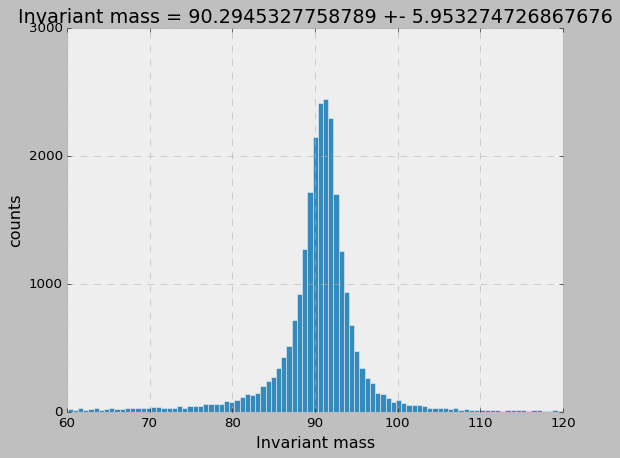

In [67]:
mass = np.array([i for i in mass if i>60 and i<120]) # filter the data to get events with invariant mass between 60 and 120 GeV
plt.hist(mass, bins=95)
plt.title(f'Invariant mass = {mass.mean()} +- {mass.std()}')
plt.xlabel('Invariant mass')
plt.ylabel('counts')
plt.yticks(np.arange(0,3100, 1000))
plt.savefig("invariant_mass_cuts_60_120.png")